# Memprediksi Tsunami dari Dataset Gempa Bumi

## **Business Understanding**

### **Proyek**: *Analisis dan Prediksi Tsunami Berdasarkan Data Geografis dan Parameter Gempa*

---

### **1. Latar Belakang**
Tsunami merupakan bencana alam yang memiliki dampak signifikan terhadap kehidupan manusia, infrastruktur, dan ekonomi, terutama di wilayah pesisir. Mengidentifikasi potensi tsunami berdasarkan parameter gempa seperti **magnitude**, **depth**, **latitude**, dan **longitude** dapat membantu dalam upaya mitigasi bencana dan pengambilan keputusan yang cepat.

Dengan memanfaatkan metode **Machine Learning**, kita dapat membangun model prediktif (supervised learning) serta menganalisis pola tersembunyi dalam data (unsupervised learning). Tujuan utama dari proyek ini adalah meningkatkan deteksi dini tsunami dan memahami karakteristik geografis yang memengaruhi kejadian tsunami.

---

### **2. Tujuan Proyek**
1. **Prediksi Tsunami**  
   - Menggunakan **supervised learning** (seperti klasifikasi) untuk memprediksi apakah suatu gempa akan menyebabkan tsunami atau tidak berdasarkan parameter gempa.

2. **Analisis Pola Geografis**  
   - Menggunakan **unsupervised learning** (clustering dengan K-Means) untuk mengelompokkan kejadian gempa berdasarkan lokasi geografis (latitude dan longitude).  
   - Memahami distribusi lokasi kejadian tsunami dan non-tsunami dalam kelompok tersebut.

---

### **3. Permasalahan Bisnis**
- Bagaimana memprediksi potensi tsunami dengan akurasi yang baik berdasarkan parameter gempa?  
- Bagaimana menemukan pola distribusi geografis kejadian tsunami untuk memahami wilayah rawan bencana?  
- Bagaimana hasil analisis ini dapat mendukung mitigasi bencana dan pengambilan keputusan yang lebih efektif?

---

### **4. Pentingnya Proyek**
- **Deteksi Dini**: Model prediksi tsunami dapat membantu memberikan peringatan dini kepada masyarakat dan pihak berwenang.  
- **Mitigasi Risiko**: Analisis pola geografis membantu mengidentifikasi wilayah dengan risiko tinggi tsunami untuk menyusun strategi mitigasi bencana yang lebih baik.  
- **Efisiensi Keputusan**: Pemerintah dan lembaga penanganan bencana dapat memanfaatkan hasil ini untuk alokasi sumber daya yang lebih efisien.

---

### **5. Metode yang Digunakan**
1. **Supervised Learning**:  
   - Algoritma: **Random Forest** atau model klasifikasi lain.  
   - Tujuan: Memprediksi apakah suatu gempa menyebabkan tsunami atau tidak (label: 0 = tidak ada tsunami, 1 = ada tsunami).  
   - **Evaluasi Model**: Menggunakan *Confusion Matrix*, *Accuracy*, *Precision*, *Recall*, dan *F1-Score*.

2. **Unsupervised Learning**:  
   - Algoritma: **K-Means Clustering**.  
   - Tujuan: Mengelompokkan kejadian gempa berdasarkan lokasi geografis (longitude dan latitude).  
   - **Evaluasi Model**: Menggunakan *Inertia (SSE)* dan *Silhouette Score* untuk menilai kualitas cluster.

---

### **6. Pemangku Kepentingan**
1. **Badan Penanggulangan Bencana**: Menggunakan hasil prediksi dan analisis untuk peringatan dini dan strategi mitigasi.  
2. **Pemerintah Daerah**: Membantu menyusun kebijakan untuk wilayah rawan tsunami.  
3. **Masyarakat Umum**: Meningkatkan kesiapsiagaan terhadap potensi bencana tsunami.  
4. **Peneliti**: Referensi untuk analisis lebih lanjut terkait gempa dan tsunami.

---

### **7. Sukses Kriteria**
- Model prediksi memiliki **akurasi tinggi** dan performa evaluasi yang baik.  
- Pola geografis dari hasil clustering dapat memberikan **insight yang jelas** tentang distribusi tsunami.  
- Hasil dapat digunakan untuk mendukung **mitigasi bencana** secara nyata.

---

Dengan pemahaman bisnis ini, analisis data tsunami menggunakan metode supervised dan unsupervised akan membantu memecahkan permasalahan nyata terkait prediksi dan mitigasi tsunami.


## Data Understanding

### Memahami Data Awal

1. Membaca data set

In [1]:
import pandas as pd
df = pd.read_csv("earthquake_data.csv")
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


2. Melihat informasi data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [3]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,0.388747,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199
std,0.445514,3.169939,1.462724,0.487778,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050
50%,6.800000,5.000000,6.000000,0.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000
75%,7.100000,7.000000,7.000000,1.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000
max,9.100000,9.000000,9.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [4]:
df.isnull().sum()/df.shape[0]*100

title         0.000000
magnitude     0.000000
date_time     0.000000
cdi           0.000000
mmi           0.000000
alert        46.930946
tsunami       0.000000
sig           0.000000
net           0.000000
nst           0.000000
dmin          0.000000
gap           0.000000
magType       0.000000
depth         0.000000
latitude      0.000000
longitude     0.000000
location      0.639386
continent    73.657289
country      38.107417
dtype: float64

In [5]:
print(df.duplicated().sum())

0


3. Melihat informasi tsunami

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\USER\AppData\Local\Temp\ipykernel_2996\2467718454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='tsunami', palette='coolwarm')


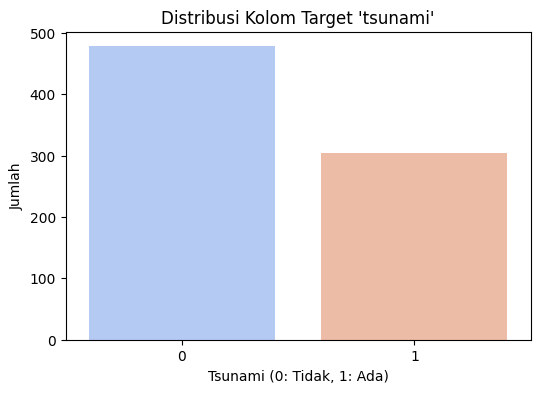

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='tsunami', palette='coolwarm')
plt.title("Distribusi Kolom Target 'tsunami'")
plt.xlabel("Tsunami (0: Tidak, 1: Ada)")
plt.ylabel("Jumlah")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2996\2032882763.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='tsunami', y=feature, palette='coolwarm')


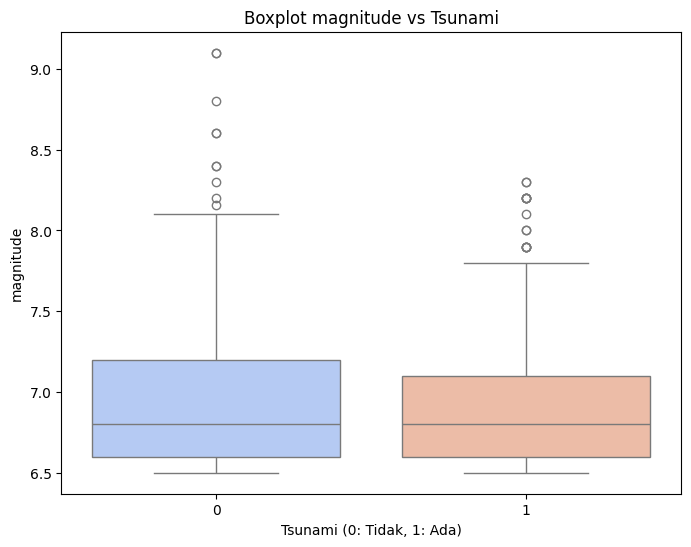

C:\Users\USER\AppData\Local\Temp\ipykernel_2996\2032882763.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='tsunami', y=feature, palette='coolwarm')


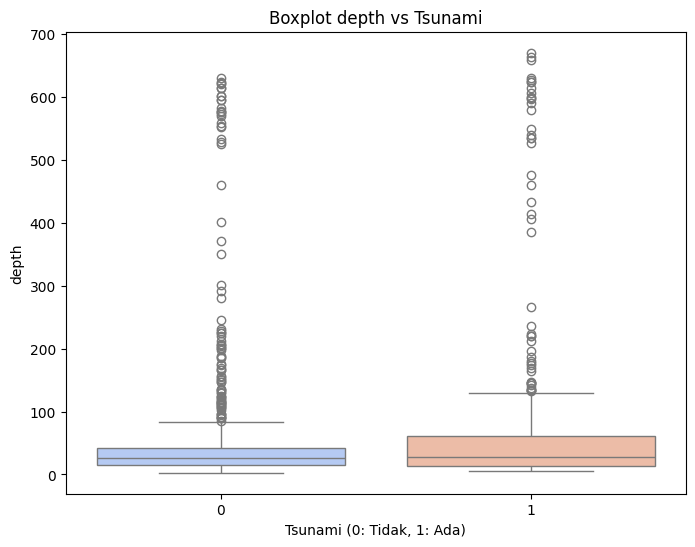

C:\Users\USER\AppData\Local\Temp\ipykernel_2996\2032882763.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='tsunami', y=feature, palette='coolwarm')


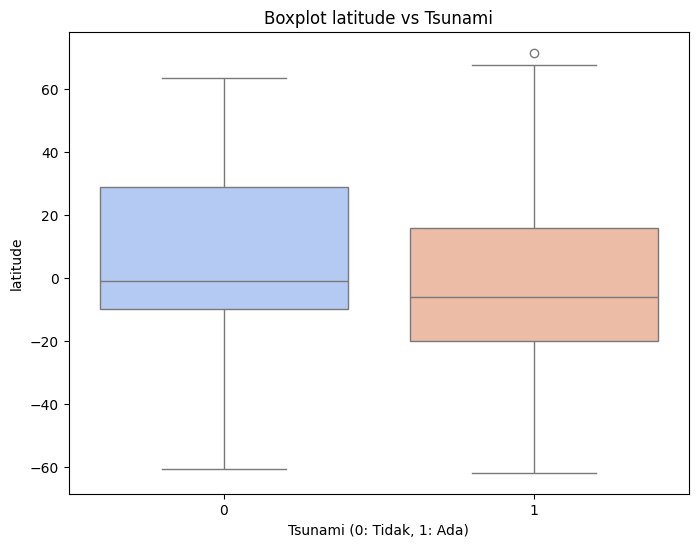

C:\Users\USER\AppData\Local\Temp\ipykernel_2996\2032882763.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='tsunami', y=feature, palette='coolwarm')


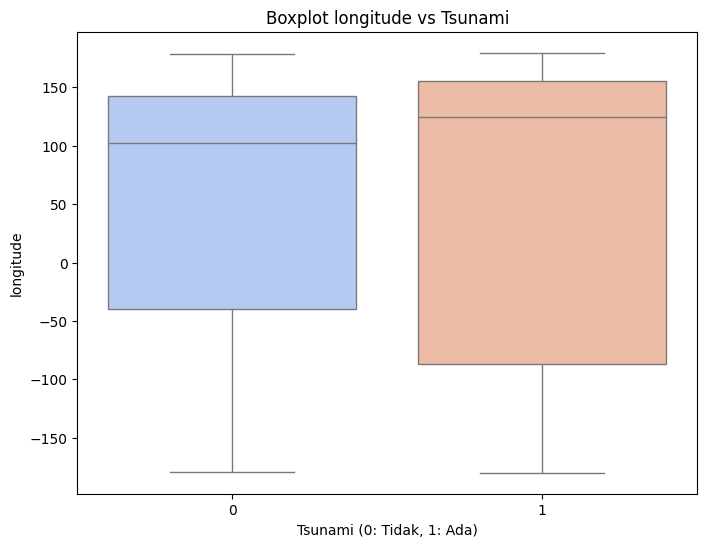

In [8]:
# Pilih fitur yang berpotensi mempengaruhi tsunami
features_of_interest = ['magnitude', 'depth', 'latitude', 'longitude']

# Mengecek apakah 'tsunami' adalah kolom target dalam data
if 'tsunami' in df.columns:
    # Loop untuk setiap fitur yang dipilih
    for feature in features_of_interest:
        if feature in df.columns:
            
            # Boxplot untuk membandingkan distribusi fitur dengan kategori target
            plt.figure(figsize=(8, 6))
            sns.boxplot(data=df, x='tsunami', y=feature, palette='coolwarm')
            plt.title(f"Boxplot {feature} vs Tsunami")
            plt.xlabel("Tsunami (0: Tidak, 1: Ada)")
            plt.ylabel(feature)
            plt.show()

**Kesimpulan Data Awal**

1. **Dataset** terdiri dari 782 baris dan 19 kolom dengan kombinasi tipe data numerik (int64, float64) dan objek (string).
2. **Kolom yang Menarik**: 
   - Kolom **magnitude**, **depth**, **latitude**, dan **longitude** merupakan fitur penting yang dapat mempengaruhi prediksi tsunami.
3. **Missing Values**:
   - Kolom **alert** dan **country** memiliki missing values yang cukup signifikan, dengan **alert** memiliki 46,9% nilai hilang dan **country** 38,1%.
   - Kolom **continent** memiliki missing values paling tinggi, yaitu 73,65%.
4. **Distribusi Tsunami**:
   - Terdapat 478 gempa yang **tidak menyebabkan tsunami** (`tsunami = 0`), dan 304 gempa yang **menyebabkan tsunami** (`tsunami = 1`), menunjukkan bahwa data cukup seimbang meskipun ada sedikit perbedaan antara kelas.
5. **Analisis Boxplot**:
   - **Magnitude**, **depth**, dan **latitude/longitude** adalah feature of interest yang dimana yang diyakini akan mempengaruhi terjadi tsunami atau tidak

Secara keseluruhan, **magnitude** dan **depth**, dan **latitude/longitude** adalah fitur yang berpotensi memprediksi tsunami, namun kita harus memprediksi dengan model terkait feature importance lain yang juga sesuai, agar meningkatkan akurasi presiksi.


### EDA

1. Membersihkan null dan unnecesarry data

In [9]:
df = df.drop(columns=['title','alert','country','continent','location'])

In [10]:
#Converting date_time to year and month
df['date_time']=pd.to_datetime(df['date_time'])
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_2996\2785639632.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time']=pd.to_datetime(df['date_time'])


In [11]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,Year,Month
0,7.0,8,7,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,2022,11
1,6.9,4,4,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,2022,11
2,7.0,3,3,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,2022,11
3,7.3,5,5,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,2022,11
4,6.6,0,2,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,2022,11


2. Distribusi magnitude 10 frekuensi tertinggi


C:\Users\USER\AppData\Local\Temp\ipykernel_2996\4237987562.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='magnitude', data=df, palette='viridis',order=Morder)


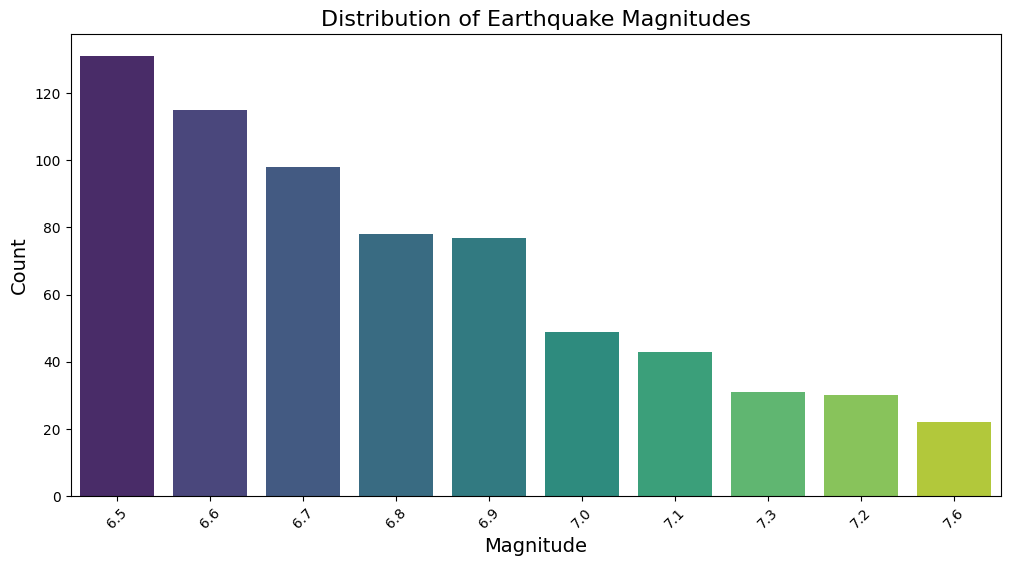

In [12]:
Morder=df['magnitude'].value_counts().head(10).index 

plt.figure(figsize=(12, 6))
sns.countplot(x='magnitude', data=df, palette='viridis',order=Morder)
plt.title('Distribution of Earthquake Magnitudes', fontsize=16)
plt.xlabel('Magnitude', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

3. Tsunami yang terjadi berdasarkan magnitude

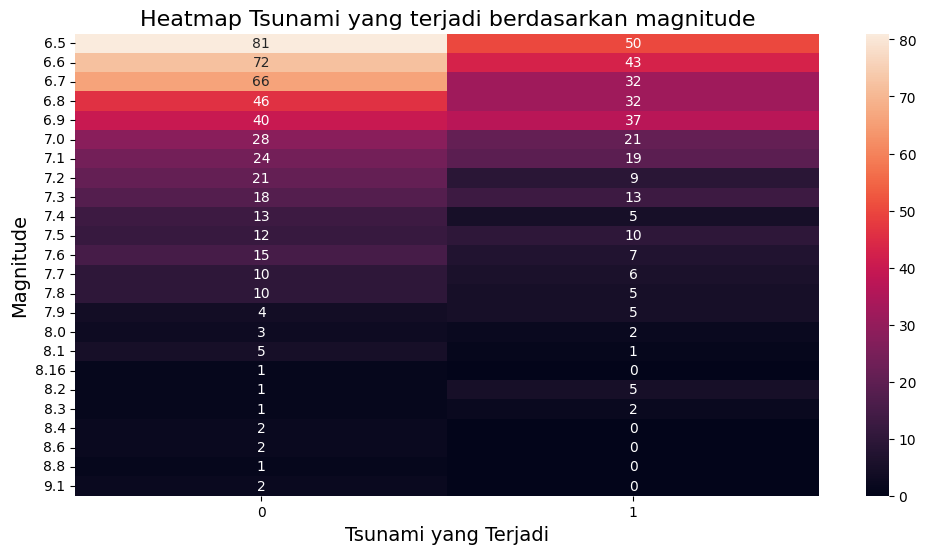

In [13]:
heatmap_data = pd.crosstab(df['magnitude'], df['tsunami'])
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True)
plt.xlabel('Tsunami yang Terjadi', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.title('Heatmap Tsunami yang terjadi berdasarkan magnitude', fontsize=16)
plt.show()

4. 15 tahun dengan gempa terbesar

C:\Users\USER\AppData\Local\Temp\ipykernel_2996\3354108965.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, order=top_years, palette='Set2')


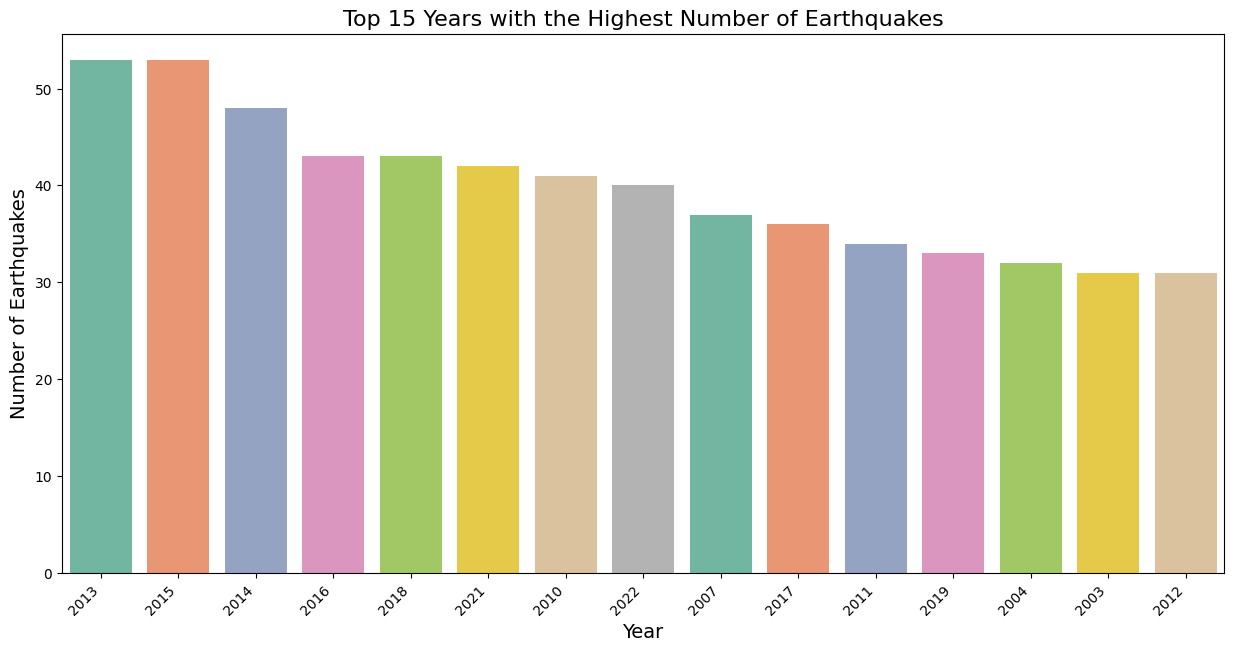

In [14]:
plt.figure(figsize=(15, 7))

top_years = df['Year'].value_counts().head(15).index
sns.countplot(x='Year', data=df, order=top_years, palette='Set2')
plt.title('Top 15 Years with the Highest Number of Earthquakes', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.show()

## Data Preparation

### Preprocessing

1. Membuat label pada kolom kategorical

In [15]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

In [16]:
df = df.drop(columns=['net'])

In [17]:
df['magType'] = lr.fit_transform(df['magType'])
df

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,magType,depth,latitude,longitude,Year,Month
0,7.0,8,7,1,768,117,0.509,17.0,8,14.000,-9.7963,159.596,2022,11
1,6.9,4,4,0,735,99,2.229,34.0,8,25.000,-4.9559,100.738,2022,11
2,7.0,3,3,1,755,147,3.125,18.0,8,579.000,-20.0508,-178.346,2022,11
3,7.3,5,5,1,833,149,1.865,21.0,8,37.000,-19.2918,-172.129,2022,11
4,6.6,0,2,1,670,131,4.998,27.0,8,624.464,-25.5948,178.278,2022,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,0,912,427,0.000,0.0,7,60.000,13.0490,-88.660,2001,1
778,6.9,5,7,0,745,0,0.000,0.0,5,36.400,56.7744,-153.281,2001,1
779,7.1,0,7,0,776,372,0.000,0.0,6,103.000,-14.9280,167.170,2001,1
780,6.8,0,5,0,711,64,0.000,0.0,7,33.000,6.6310,126.899,2001,1


In [18]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,magType,depth,latitude,longitude,Year,Month
0,7.0,8,7,1,768,117,0.509,17.0,8,14.000,-9.7963,159.596,2022,11
1,6.9,4,4,0,735,99,2.229,34.0,8,25.000,-4.9559,100.738,2022,11
2,7.0,3,3,1,755,147,3.125,18.0,8,579.000,-20.0508,-178.346,2022,11
3,7.3,5,5,1,833,149,1.865,21.0,8,37.000,-19.2918,-172.129,2022,11
4,6.6,0,2,1,670,131,4.998,27.0,8,624.464,-25.5948,178.278,2022,11


2. Scaling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()
x=df.drop('tsunami',axis=1)
y=df['tsunami']
column_x = x.columns
x_scaled=sc.fit_transform(x)
X=pd.DataFrame(x_scaled,columns=x.columns)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

4. mengatasi data imbalance

In [21]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='auto', random_state=42)
x_resample,y_resample=sm.fit_resample(x_train,y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [22]:
df_balanced = pd.concat([pd.DataFrame(x_resample, columns=column_x), pd.DataFrame(y_resample, columns=['tsunami'])], axis=1)

In [23]:
print("Distribusi data setelah Balancing:\n", df_balanced['tsunami'].value_counts())

Distribusi data setelah Balancing:
 tsunami
1    375
0    375
Name: count, dtype: int64


In [ ]:
df_balanced.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,magType,depth,latitude,longitude,Year,Month,tsunami
0,-0.990783,-1.368018,0.024494,-0.683018,-0.920899,-0.266421,-0.042916,0.589322,-0.407344,1.759850,-1.929804,0.118111,0.694901,1
1,-0.541576,0.841640,0.024494,-0.081018,-0.920899,-0.025596,3.013726,0.589322,-0.472947,-1.429816,-1.067463,1.102437,0.694901,1
2,-0.092369,0.841640,0.708588,0.365828,0.606929,-0.597892,0.399057,0.589322,-0.363609,-1.464493,-1.065740,-0.209998,-1.301891,0
3,-0.990783,1.472971,0.708588,-0.425461,-0.920899,-0.404872,-0.249446,0.589322,-0.480236,0.123569,0.615911,1.102437,0.980157,1
4,-0.766179,-0.105356,0.024494,-0.617853,-0.920899,0.936798,-0.538588,0.589322,0.226817,-0.571880,0.967878,1.266492,-0.446123,1


## Pemodelan

### Build Model Supervised Learning

1. Split dataset

In [25]:
from sklearn.model_selection import train_test_split
y = df_balanced['tsunami']
x = df_balanced.drop(columns=['tsunami'], axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

2. Membuat model

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [28]:
y_pred = rf_model.predict(X_test)

### Evaluasi Model Supervised Learning

In [29]:
import sys
sys.path.append(r"c:\laragon\bin\python\python-3.10\lib\site-packages")
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

1. Melihat Akurasi Model

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.88


2. Melihat hasil confusion matrix

[[ 93  23]
 [  4 105]]


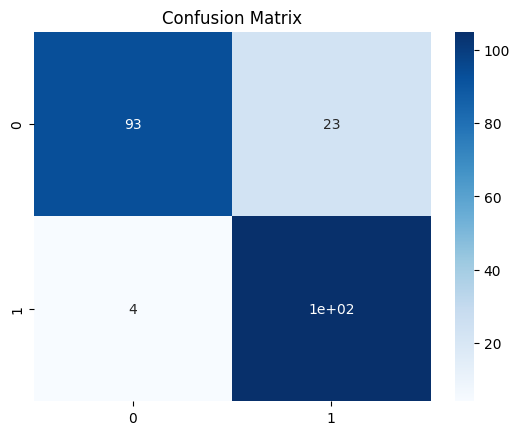

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

import seaborn as sns
sns.heatmap(conf_matrix,annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

3. Melihat Classification Report

In [32]:
clf_report = classification_report(y_test, y_pred)
print(f"Classification report : \n{clf_report}")

Classification report : 
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       116
           1       0.82      0.96      0.89       109

    accuracy                           0.88       225
   macro avg       0.89      0.88      0.88       225
weighted avg       0.89      0.88      0.88       225



4. Menampilkan P-value dari variable prediktor

In [33]:
X_train_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train,X_train_const)
result = logit_model.fit()
print(f"P-Values: \n {result.pvalues}")

Optimization terminated successfully.
         Current function value: 0.318057
         Iterations 8
P-Values: 
 const        6.144359e-07
magnitude    8.487831e-06
cdi          1.749539e-04
mmi          9.309496e-01
sig          9.767091e-03
nst          5.161692e-06
dmin         1.135101e-01
gap          3.145541e-01
magType      7.046306e-03
depth        2.707440e-02
latitude     3.198912e-01
longitude    2.782824e-01
Year         1.390077e-12
Month        1.943855e-01
dtype: float64


5. Membuat probabilitas prediksi

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_pred_prob = rf_model.predict_proba(X_test)[:,1]

6. Hitung Thresholds dan auc

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

7. Menghitung AUC

In [36]:
roc_auc = auc(fpr, tpr)
print(f"AUC : {roc_auc}")

AUC : 0.9437677950015817


8. Membuat visualisasi ROC-AUC

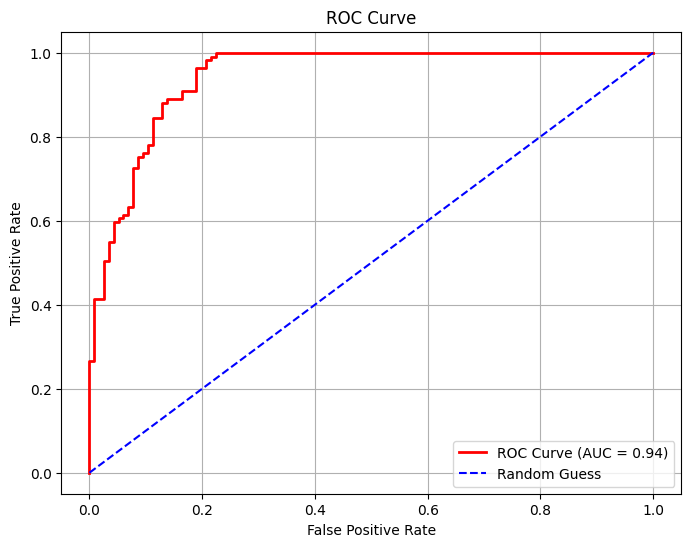

In [37]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], color='blue', linestyle='--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Build Model Unsupervised Learning

In [38]:
from sklearn.cluster import KMeans

In [39]:
df_balanced.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,magType,depth,latitude,longitude,Year,Month,tsunami
0,-0.990783,-1.368018,0.024494,-0.683018,-0.920899,-0.266421,-0.042916,0.589322,-0.407344,1.759850,-1.929804,0.118111,0.694901,1
1,-0.541576,0.841640,0.024494,-0.081018,-0.920899,-0.025596,3.013726,0.589322,-0.472947,-1.429816,-1.067463,1.102437,0.694901,1
2,-0.092369,0.841640,0.708588,0.365828,0.606929,-0.597892,0.399057,0.589322,-0.363609,-1.464493,-1.065740,-0.209998,-1.301891,0
3,-0.990783,1.472971,0.708588,-0.425461,-0.920899,-0.404872,-0.249446,0.589322,-0.480236,0.123569,0.615911,1.102437,0.980157,1
4,-0.766179,-0.105356,0.024494,-0.617853,-0.920899,0.936798,-0.538588,0.589322,0.226817,-0.571880,0.967878,1.266492,-0.446123,1


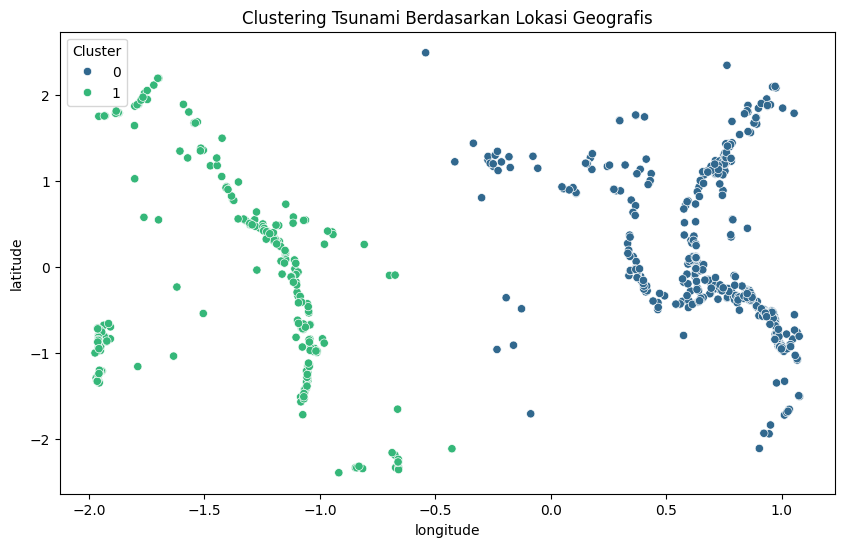

In [40]:
numerical_features = ['magnitude', 'depth', 'latitude', 'longitude']
X = df_balanced[numerical_features]

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df_balanced['Cluster'] = kmeans.fit_predict(X)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='Cluster', data=df_balanced, palette='viridis')
plt.title('Clustering Tsunami Berdasarkan Lokasi Geografis')
plt.show()

### Evaluasi Model Unsupervised Learning

Inertia (Sum of Squared Errors): 2333.051684190066
Silhouette Score: 0.3194047810969034


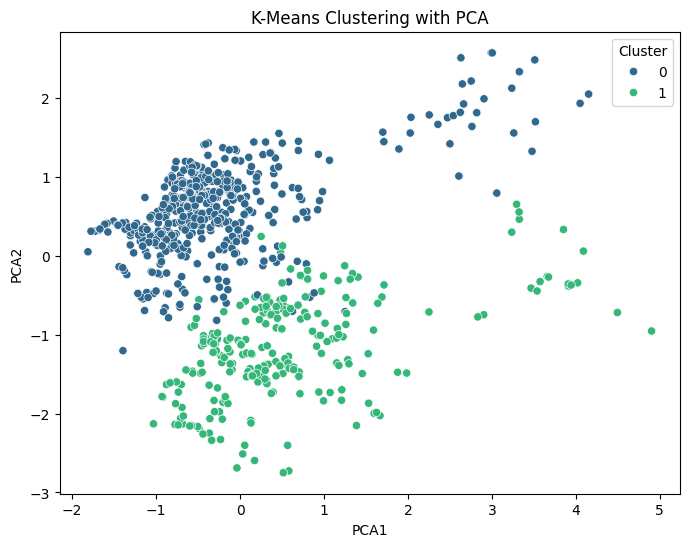

In [41]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score# Inertia (SSE)
print("Inertia (Sum of Squared Errors):", kmeans.inertia_)

# Silhouette Score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# PCA untuk Visualisasi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_balanced['PCA1'] = X_pca[:, 0]
df_balanced['PCA2'] = X_pca[:, 1]

# Plot hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_balanced, palette='viridis')
plt.title("K-Means Clustering with PCA")
plt.show()

### Export model supervised learning

In [42]:
import pickle

with open('model_supervised_rf.pkl', 'wb') as f:
    pickle.dump(rf_model,f)

### Export model unsupervised learing

In [43]:
with open('model_unsupervised_kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans,f)

## Deploy

In [44]:
%%writefile tsunami_app.py
import pandas as pd
import numpy as np
import pickle
import streamlit as st
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Load supervised and unsupervised models
pickle_in_supervised = open('model_supervised_rf.pkl', 'rb')
supervised_model = pickle.load(pickle_in_supervised)

pickle_in_unsupervised = open('model_unsupervised_kmeans.pkl', 'rb')
unsupervised_model = pickle.load(pickle_in_unsupervised)

# Data loading and preprocessing
def load_and_preprocess_data():
    df = pd.read_csv('earthquake_data.csv')

    # Drop unnecessary columns
    df = df.drop(columns=['title', 'alert', 'country', 'continent', 'location', 'net'])

    # Convert date_time to year and month
    df['date_time'] = pd.to_datetime(df['date_time'])
    df['Year'] = pd.DatetimeIndex(df["date_time"]).year
    df['Month'] = pd.DatetimeIndex(df["date_time"]).month
    df.drop('date_time', axis=1, inplace=True)

    # Label encode categorical variable
    lr = LabelEncoder()
    df['magType'] = lr.fit_transform(df['magType'])

    # Scale features
    sc = StandardScaler()
    X = df.drop('tsunami', axis=1)
    y = df['tsunami']
    X_scaled = sc.fit_transform(X)
    X = pd.DataFrame(X_scaled, columns=X.columns)

    # Handle imbalanced data
    sm = SMOTE(random_state=42)
    X_resample, y_resample = sm.fit_resample(X, y)
    df_balanced = pd.concat([pd.DataFrame(X_resample, columns=X.columns), pd.DataFrame(y_resample, columns=['tsunami'])], axis=1)

    return df_balanced, X_resample, y_resample

# Supervised prediction function
def prediction_supervised(input_data):
    pred = supervised_model.predict(input_data)
    proba = supervised_model.predict_proba(input_data)[:, 1]
    return pred, proba

# Unsupervised prediction function
def prediction_unsupervised(input_data):
    cluster = unsupervised_model.predict(input_data)
    return cluster

# Evaluation function for supervised model
def evaluate_model(X_test, y_test):
    y_pred = supervised_model.predict(X_test)
    y_pred_proba = supervised_model.predict_proba(X_test)[:, 1]

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
    }
    return metrics, y_pred, y_pred_proba

# Plot ROC curve
def plot_roc_curve(fpr, tpr, auc):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='red', label=f"ROC Curve (area = {auc:.2f})")
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    st.pyplot(plt)

# Plot confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tsunami', 'Tsunami'], yticklabels=['No Tsunami', 'Tsunami'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    st.pyplot(plt)

# Streamlit application
def main():
    st.title("Tsunami Prediction from Earthquake Data")

    # HTML style for header
    html_temp = """
    <div style="background-color:darkblue; padding:13px; border-radius:15px; margin-bottom:20px;">
        <h1 style="color:white; text-align:center;">Tsunami Classifier ML App</h1>
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html=True)

    # Load and preprocess data
    df, X, y = load_and_preprocess_data()

    # Show dataframe
    if st.checkbox("Show Dataset"):
        st.dataframe(df.head())

    # Model evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    metrics, y_pred, y_pred_proba = evaluate_model(X_test, y_test)

    # Display metrics
    st.subheader("Model Evaluation Metrics")
    col1, col2, col3, col4 = st.columns(4)
    col1.metric("Accuracy", f"{metrics['accuracy']:.2f}")
    col2.metric("Precision", f"{metrics['precision']:.2f}")
    col3.metric("Recall", f"{metrics['recall']:.2f}")
    col4.metric("F1 Score", f"{metrics['f1']:.2f}")

    # Plot options
    plot_option = st.selectbox("Choose a plot to display:", ["Select", "ROC AUC Curve", "Confusion Matrix"])
    if plot_option == "ROC AUC Curve":
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plot_roc_curve(fpr, tpr, metrics['roc_auc'])
    elif plot_option == "Confusion Matrix":
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(cm)

    # Input prediksi
    st.subheader("Prediction Input")
    magnitude = st.number_input("Magnitude", value=float(df['magnitude'].mean()))
    cdi = st.number_input("CDI", value=float(df['cdi'].mean()))
    mmi = st.number_input("MMI", value=float(df['mmi'].mean()))
    sig = st.number_input("SIG", value=float(df['sig'].mean()))
    nst = st.number_input("NST", value=float(df['nst'].mean()))
    dmin = st.number_input("Dmin", value=float(df['dmin'].mean()))
    gap = st.number_input("Gap", value=float(df['gap'].mean()))
    magType = st.number_input("MagType", value=float(df['magType'].mean()))
    depth = st.number_input("Depth (km)", value=float(df['depth'].mean()))
    latitude = st.number_input("Latitude", value=float(df['latitude'].mean()))
    longitude = st.number_input("Longitude", value=float(df['longitude'].mean()))
    year = st.number_input("Year", value=int(df['Year'].mean()))
    month = st.number_input("Month", value=int(df['Month'].mean()))
    
    # Buat input menjadi DataFrame
    input_data_rf = pd.DataFrame([[magnitude, cdi, mmi, sig, nst, dmin, gap, magType, depth, latitude, longitude, year, month]],
                              columns=['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 
                                       'magType', 'depth', 'latitude', 'longitude', 'Year', 'Month'])
    input_data_kmeans = pd.DataFrame([[magnitude, depth, latitude, longitude]],
                              columns=['magnitude', 'depth', 'latitude', 'longitude'])

    # Prediksi
    if st.button("Predict (Supervised Model)"):
        result, proba = prediction_supervised(input_data_rf)
        st.success(f'Prediction (Supervised): {"Tsunami" if result[0] == 1 else "No Tsunami"}')
        st.info(f'Probability: {proba[0]:.2f}')

    if st.button("Predict (Unsupervised Model)"):
        cluster = prediction_unsupervised(input_data_kmeans)
        st.success(f'Cluster: {cluster[0]}')

if __name__ == '__main__':
    main()


Writing tsunami_app.py
